In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.datasets import make_moons
from scipy.sparse.linalg import cg
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

from sklearn.ensemble import RandomForestClassifier
#from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

from lightonopu.opu import OPU
from lightonml.random_projections.opu import OPURandomMapping

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from lightonml.datasets import MNIST, FashionMNIST
from sklearn.pipeline import Pipeline
import time as time

from lightonml.encoding.base import NoDecoding
from lightonml.encoding.base import BinaryThresholdEncoder



In [3]:
random_state = np.random.RandomState(1234)

(X_train, y_train), (X_test, y_test) = FashionMNIST()
X, y = np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test])
X.shape

(70000, 28, 28)

In [3]:
pipeline_steps = []

encoder = BinaryThresholdEncoder()
print('Encoder threshold: ', encoder.threshold_enc)

pipeline_steps.append(('encoder', encoder))

Encoder threshold:  25


In [4]:

D = 10000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)

random_mapping = OPURandomMapping(opu=opu)

pipeline_steps.append(('mapping', random_mapping))

In [5]:


pipeline_steps.append(('decoding', NoDecoding()))



In [6]:
classifier = RidgeClassifier()

pipeline_steps.append(('classifier', classifier))

In [7]:
pipe = Pipeline(steps=pipeline_steps)



pipe.named_steps

{'classifier': RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001),
 'decoding': NoDecoding(),
 'encoder': BinaryThresholdEncoder(greater_is_one=True, threshold_enc=25),
 'mapping': OPURandomMapping(opu=<lightonopu.opu.OPU object at 0x7f0b56686cf8>)}

In [9]:
opu.open()

print('Fitting the model...')
t1 = time.time()
pipe.fit(X_train, y_train)
print ('elapsed time is {:.2f} seconds'.format(time.time() - t1))

Fitting the model...
elapsed time is 89.68 seconds


In [10]:
train_accuracy = pipe.score(X_train, y_train)
test_accuracy = pipe.score(X_test, y_test)

print('Train accuracy {:.2f}'.format(train_accuracy * 100))
print('Test accuracy {:.2f}'.format(test_accuracy * 100))


Train accuracy 91.39
Test accuracy 88.14


In [11]:
opu.close()

In [13]:
#SGD
pipeline_steps_SGD = []

encoder = BinaryThresholdEncoder()
print('Encoder threshold: ', encoder.threshold_enc)

pipeline_steps_SGD.append(('encoder', encoder))

D = 10000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)
random_mapping = OPURandomMapping(opu=opu)

pipeline_steps_SGD.append(('mapping', random_mapping))

pipeline_steps_SGD.append(('decoding', NoDecoding()))

classifier = SGDClassifier(max_iter = 100)
pipeline_steps_SGD.append(('classifier', classifier))

pipe_SGD = Pipeline(steps=pipeline_steps_SGD)
pipe_SGD.named_steps

Encoder threshold:  25


{'classifier': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 'decoding': NoDecoding(),
 'encoder': BinaryThresholdEncoder(greater_is_one=True, threshold_enc=25),
 'mapping': OPURandomMapping(opu=<lightonopu.opu.OPU object at 0x7f0b564076d8>)}

In [14]:
opu.open()

print('Fitting the model...')
t1 = time.time()
pipe_SGD.fit(X_train, y_train)
print ('elapsed time is {:.2f} seconds'.format(time.time() - t1))

opu.close()

train_accuracy = pipe_SGD.score(X_train, y_train)
test_accuracy = pipe_SGD.score(X_test, y_test)

print('Train accuracy {:.2f}'.format(train_accuracy * 100))
print('Test accuracy {:.2f}'.format(test_accuracy * 100))

Fitting the model...
elapsed time is 750.88 seconds
Train accuracy 88.69
Test accuracy 85.54


In [18]:
#Random Forest
pipeline_steps_RF = []

encoder = BinaryThresholdEncoder()
print('Encoder threshold: ', encoder.threshold_enc)

pipeline_steps_RF.append(('encoder', encoder))

D = 10000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)
random_mapping = OPURandomMapping(opu=opu)

pipeline_steps_RF.append(('mapping', random_mapping))

pipeline_steps_RF.append(('decoding', NoDecoding()))

classifier = RandomForestClassifier()
pipeline_steps_RF.append(('classifier', classifier))

pipe_RF = Pipeline(steps=pipeline_steps_RF)
pipe_RF.named_steps

Encoder threshold:  25


{'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'decoding': NoDecoding(),
 'encoder': BinaryThresholdEncoder(greater_is_one=True, threshold_enc=25),
 'mapping': OPURandomMapping(opu=<lightonopu.opu.OPU object at 0x7f0b42e5bc88>)}

In [19]:
opu.open()

print('Fitting the model...')
t1 = time.time()
pipe_RF.fit(X_train, y_train)
print ('elapsed time is {:.2f} seconds'.format(time.time() - t1))

opu.close()

train_accuracy = pipe_RF.score(X_train, y_train)
test_accuracy = pipe_RF.score(X_test, y_test)

print('Train accuracy {:.2f}'.format(train_accuracy * 100))
print('Test accuracy {:.2f}'.format(test_accuracy * 100))

Fitting the model...
elapsed time is 87.64 seconds
Train accuracy 88.35
Test accuracy 82.22


In [20]:
#KRR
pipeline_steps_KRR = []

encoder = BinaryThresholdEncoder()
print('Encoder threshold: ', encoder.threshold_enc)

pipeline_steps_KRR.append(('encoder', encoder))

D = 10000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)
random_mapping = OPURandomMapping(opu=opu)

pipeline_steps_KRR.append(('mapping', random_mapping))

pipeline_steps_KRR.append(('decoding', NoDecoding()))

classifier = RidgeClassifier(alpha = 0.01)
pipeline_steps_KRR.append(('classifier', classifier))

pipe_KRR = Pipeline(steps=pipeline_steps_KRR)
pipe_KRR.named_steps

Encoder threshold:  25


{'classifier': RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001),
 'decoding': NoDecoding(),
 'encoder': BinaryThresholdEncoder(greater_is_one=True, threshold_enc=25),
 'mapping': OPURandomMapping(opu=<lightonopu.opu.OPU object at 0x7f0b392d9f60>)}

In [21]:
opu.open()

print('Fitting the model...')
t1 = time.time()
pipe_KRR.fit(X_train, y_train)
print ('elapsed time is {:.2f} seconds'.format(time.time() - t1))

opu.close()

train_accuracy = pipe_KRR.score(X_train, y_train)
test_accuracy = pipe_KRR.score(X_test, y_test)

print('Train accuracy {:.2f}'.format(train_accuracy * 100))
print('Test accuracy {:.2f}'.format(test_accuracy * 100))

Fitting the model...
elapsed time is 89.21 seconds
Train accuracy 90.85
Test accuracy 87.90


In [4]:
X_train.shape

(60000, 28, 28)

In [4]:
#KRR loop
pipeline_steps_KRR = []

Dim = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
train_acc = []
test_acc = []

acc_tr = 0
acc_te = 0
n_avg = 5
for D in tqdm(Dim):
    
    encoder = BinaryThresholdEncoder()
    pipeline_steps_KRR.append(('encoder', encoder))

    Dim_OPU = D # number of random projections
    opu = OPU(n_components=Dim_OPU, disable_pbar = False, verbose_level = 0)
    random_mapping = OPURandomMapping(opu=opu)

    pipeline_steps_KRR.append(('mapping', random_mapping))

    pipeline_steps_KRR.append(('decoding', NoDecoding()))

    classifier = RidgeClassifier(alpha = 0.01)
    pipeline_steps_KRR.append(('classifier', classifier))

    pipe_KRR = Pipeline(steps=pipeline_steps_KRR)
    for i in tqdm(range(n_avg)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)
        pipe_KRR.fit(X_train, y_train)
        
        acc_tr += pipe_KRR.score(X_train, y_train)
        acc_te += pipe_KRR.score(X_test, y_test)
        
        
    train_acc.append(acc_tr/n_avg)
    test_acc.append(acc_te/n_avg)
    
    acc_tr = 0
    acc_te = 0
    
    pipeline_steps_KRR.clear()
    
opu.close()

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

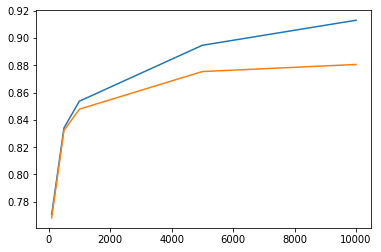

In [31]:
plt.plot(Dim, train_acc)
plt.plot(Dim, test_acc)

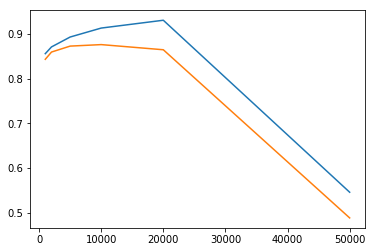

In [6]:
#with shuffled data
plt.plot(Dim[:6], train_acc)
plt.plot(Dim[:6], test_acc)

In [42]:
from tqdm import tqdm
def Kernel_OPU(X):
    n = X.shape[0]
    d = X.shape[1]
    K = np.zeros((n,n))
    for i in tqdm(range(n)):
        for j in range(n):
            K[i,j] = LA.norm(X[i,:])**2 * LA.norm(X[j,:])**2 + (X[i,:].reshape(1,-1)@(X[j,:].reshape(-1,1)))**2
    return K

In [43]:
K_train = Kernel_OPU(X_train)
K_test = Kernel_OPU(X_test)

  0%|          | 7/60000 [00:07<17:24:11,  1.04s/it]


KeyboardInterrupt: 

In [40]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0,kernel=K)
clf.fit(X, y) 

NameError: name 'K' is not defined

In [34]:
X_train.shape

(60000, 28, 28)

In [10]:
import time as time

from lightonml.encoding.base import NoDecoding

D = 100000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)
random_mapping = OPURandomMapping(opu=opu)

t1=time.time()
encoder = BinaryThresholdEncoder()
X_tr = encoder.fit(X_train)
X_te = encoder.fit(X_test)

opu.open()
print('tic')
FM_train = random_mapping.fit(X_tr)
print('toc')
FM_test = random_mapping.fit(X_te)

FM_tr = NoDecoding.transform(FM_train,y_train)
FM_te = NoDecoding.transform(FM_test,y_test)


opu.close()

OPUUsedByOther: OPU is already used by anothor process.

In [7]:
FM_tr

array([9, 1, 4, ..., 7, 6, 6], dtype=uint8)

In [9]:
D = 100000 # number of random projections
opu = OPU(n_components=D, disable_pbar = False, verbose_level = 0)
random_mapping = OPURandomMapping(opu=opu)

opu.open()
print('tic')
FM_train = random_mapping.fit(X_tr)
print('toc')
FM_test = random_mapping.fit(X_te)

FM_tr = NoDecoding.transform(FM_train,y_train)
FM_te = NoDecoding.transform(FM_test,y_test)

classifier = RidgeClassifier()

classifier.fit(FM_train,y_train)

print('elapsed time is', t2-time.time())

print('train accuracy is', classifier.score(FM_train, y_train))
print('test accuracy is', classifier.score(FM_test,y_test))
opu.close()

tic
toc


ValueError: Expected 2D array, got scalar array instead:
array=OPURandomMapping(opu=<lightonopu.opu.OPU object at 0x7fa2706fa7b8>).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.